In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The SSH Model

<br>

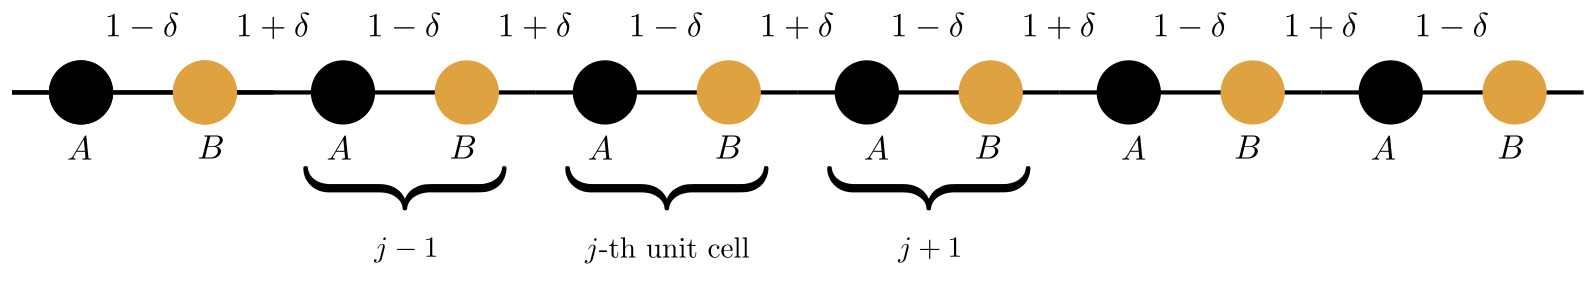

The SSH model with $N$ unit cells is defined as:
$$H_\text{SSH} = \sum_{j = 0}^{N-1} (1-\delta)c_{A,j}^\dagger c_{B,j} + (1+\delta) c_{B,j}^\dagger c_{A,j+1} + \text{h.c.}$$

#### Question 3

Without exploiting translational invariance, we can still diagonalize the SSH Hamiltonian using the standard method to diagonalize quadratic fermionic Hamiltonian. Since $H_\text{SSH}$ only involves terms of the form $c_i^\dagger c_j$, the procedure is even simpler as we don't have to put the Hamiltonian in the form that has the correct symmetries. We can write:

$$H_\text{SSH} = c^\dagger M c$$
with
$$c = \begin{pmatrix}
c_{A,1} \\
c_{B,1} \\
c_{A,2} \\
\vdots \\
c_{B,N-1}
\end{pmatrix}$$
and
$$M = \begin{pmatrix}
0 & 1 - \delta &  &  &  &  & 1 + \delta \\
1 - \delta & 0 & 1 + \delta &  &  &  &  \\
 & 1+\delta & 0 & 1 - \delta &  &  &  \\
 &  & 1 - \delta & \ddots & \ddots &  & \\
 &  &  & \ddots & \ddots & 1 + \delta &  \\
 &  &  &  & 1 + \delta & 0 & 1-\delta \\
1 + \delta &  &  & &  & 1-\delta & 0
\end{pmatrix}$$

Then, since $M$ is hermitian, we can diagonalize it in an orthogonal basis: $M = U^\dagger \Lambda U$, so that $H_\text{SSH} = c^\dagger U^\dagger \Lambda U c$. We define new operators $d = Uc$ ($d_i = \sum_j U_{ij} c_j$), and as a consequence get $d^\dagger = c^\dagger U^\dagger$ ($d_j^\dagger = \sum_i c_j^\dagger (U^\dagger)_{ji}$). We can show that those $d$ satisfy the fermionic anticommutation relations, and thus define fermionic creation and annihilation operators:

\begin{align}
\{d_i, d_j^\dagger\} &= \left\{\sum_k U_{ik} c_k, \sum_p c_p^\dagger (U^\dagger)_{pj} \right\} \\
&= \sum_{k,p} U_{ik} (U^\dagger)_{pj} \left\{c_k, c_p^\dagger \right\} \\
&= \sum_{k,p} U_{ik} (U^\dagger)_{pj} \delta_{kp} \\
&= \sum_{k} U_{ik} (U^\dagger)_{kj} \\
&= \left(U U^\dagger \right)_{ij} \\
&= \delta_{ij}
\end{align}

We can also easily show that $\{d_i, d_j\} = 0$. Using those fermionic operators, the Hamiltonian now writes $H_\text{SSH} = d^\dagger \Lambda d$, or more explicitly:

$$H_\text{SSH} = \sum_k \lambda_k d_k^\dagger d_k$$

So we can obtain the eigenmodes from diagonalizing the matrix $M$. This can easily be done with the function `np.linalg.eigh` as we do in the following (`eigh` diagonalizes symmetric matrices with a more efficient algorithm than `eig` that diagonalizes a general matrix). Note that unlike the diagonalization of the Hamiltonian itself ($2^{2N} \times 2^{2N}$ matrix), diagonalization of $M$ ($2N \times 2N$ matrix) is tractable.

In [2]:
# Construct the matrix M for periodic boundary conditions

delta = 0.5
N = 1000

matrix_periodic = np.zeros((2*N, 2*N))
i,j = np.indices((2*N, 2*N))

# Fill the superdiagonal (and the element in the bottom left)
matrix_periodic[(j==((i+1)%(2*N))) & (i%2 == 0)] = 1 - delta
matrix_periodic[(j==((i+1)%(2*N))) & (i%2 == 1)] = 1 + delta

# Fill the subdiagonal (and the element in the top right)
matrix_periodic += matrix_periodic.T

print(matrix_periodic)

[[0.  0.5 0.  ... 0.  0.  1.5]
 [0.5 0.  1.5 ... 0.  0.  0. ]
 [0.  1.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  1.5 0. ]
 [0.  0.  0.  ... 1.5 0.  0.5]
 [1.5 0.  0.  ... 0.  0.5 0. ]]


In [3]:
# Diagonalize the matrix M to get the eigenmodes
eigvals_periodic, eigvecs_periodic = np.linalg.eigh(matrix_periodic)

# Reorder the eigenmodes so that they match the ordering in the analytical calculation given by k vectors
numerical_lower_band_periodic = np.append(np.flip(eigvals_periodic[1:N:2]), eigvals_periodic[:N:2])
numerical_upper_band_periodic = np.append(eigvals_periodic[N::2], np.flip(eigvals_periodic[N+1::2]))

# Analytical energies
k = np.linspace(-np.pi, np.pi, N)
analytical_upper_band = np.sqrt(2 * (1 + delta**2 + (1 - delta**2) * np.cos(k)))

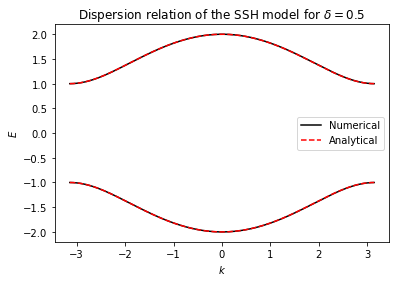

In [4]:
# Plot the numerical and analytical dispersion relations
plt.plot(k, numerical_upper_band_periodic, c = 'k', label = "Numerical")
plt.plot(k, numerical_lower_band_periodic, c = 'k')
plt.plot(k, analytical_upper_band, 'r--', label = "Analytical")
plt.plot(k, -analytical_upper_band, 'r--')
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$E$")
plt.title("Dispersion relation of the SSH model for $\delta = {}$".format(delta))
print()

#### Question 4

For open boundary conditions, we follow the same steps, but the matrix $M_\text{open}$ no longer has elements in the bottom left and top right:

$$M_\text{open} = \begin{pmatrix}
0 & 1 - \delta &  &  &  &  & 0 \\
1 - \delta & 0 & 1 + \delta &  &  &  &  \\
 & 1+\delta & 0 & 1 - \delta &  &  &  \\
 &  & 1 - \delta & \ddots & \ddots &  & \\
 &  &  & \ddots & \ddots & 1 + \delta &  \\
 &  &  &  & 1 + \delta & 0 & 1-\delta \\
0 &  &  & &  & 1-\delta & 0
\end{pmatrix}$$

In [5]:
# Construct the matrix M for open boundary conditions

delta = 0.5
N = 1000

matrix_open = np.zeros((2*N, 2*N))
i,j = np.indices((2*N, 2*N))

# Fill the superdiagonal
matrix_open[(j==(i+1)) & (i%2 == 0)] = 1 - delta
matrix_open[(j==(i+1)) & (i%2 == 1)] = 1 + delta

# Fill the subdiagonal
matrix_open += matrix_open.T

print(matrix_open)

# Diagonalize the matrix M to get the eigenmodes
eigvals_open, eigvecs_open = np.linalg.eigh(matrix_open)

[[0.  0.5 0.  ... 0.  0.  0. ]
 [0.5 0.  1.5 ... 0.  0.  0. ]
 [0.  1.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  1.5 0. ]
 [0.  0.  0.  ... 1.5 0.  0.5]
 [0.  0.  0.  ... 0.  0.5 0. ]]


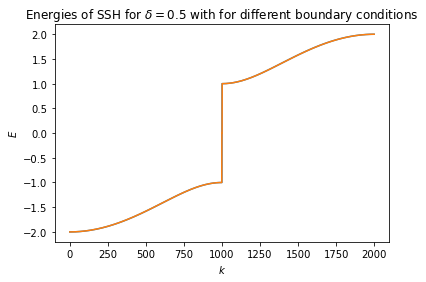

In [10]:
# Plot the numerical energies for open and periodic boundary condition, in increasing order
plt.plot(eigvals_periodic, label='periodic boundary conditions')
plt.plot(eigvals_open, label='open boundary conditions')
plt.xlabel(r"$k$")
plt.ylabel(r"$E$")
plt.title("Energies of SSH for $\delta = {}$ with for different boundary conditions".format(delta))
print()

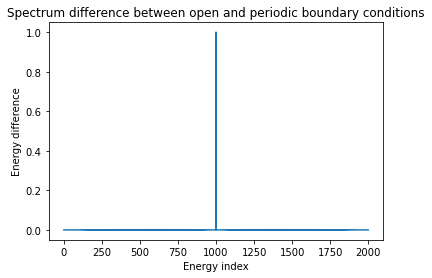

In [8]:
# Plot the energy difference between open and periodic boundary conditions when both are in increasing order
spectrum_difference = abs(eigvals_periodic - eigvals_open)
plt.plot(spectrum_difference)
plt.xlabel("Energy index")
plt.ylabel("Energy difference")
plt.title("Spectrum difference between open and periodic boundary conditions")
print("")

In [9]:
print("Indices where the energy difference is larger than 0.01:")
for k in np.nonzero(spectrum_difference > 0.01)[0]:
    print("Index: {},\tEnergy difference: {:.4}".format(k, spectrum_difference[k]))

Indices where the energy difference is larger than 0.01:
Index: 999,	Energy difference: 1.0
Index: 1000,	Energy difference: 1.0


(-5.0, 100.0)

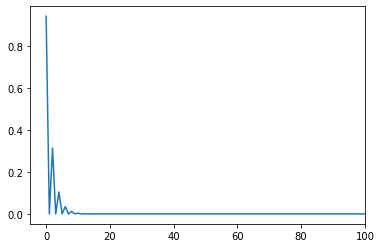

In [25]:
plt.plot(abs(eigvecs_open[:,1000]))
plt.xlim(-5, 100)